In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import glob
import splat
import astropy.units as u
import popsims
splat.initializeStandards(all=True)
from scipy import interpolate
from tqdm import tqdm
import wisps
%matplotlib inline



Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#read in Zhang samples
files=glob.glob('/volumes/LaCie/zhang/*/*.fits')

In [3]:
len(files)

119

In [4]:
def get_spectrum(f):
    try:
        hdu=fits.open(f)[0]
        wave=np.array([hdu.header['CRVAL1']+hdu.header['CDELT1']*x for x \
          in range(0, hdu.header['NAXIS1'])])*u.angstrom.to(u.micron)
        flux= hdu.data*u.erg/(u.cm**2 * u.s * u.micron)
        s=splat.Spectrum(wave=wave, flux=flux, noise=flux/1000, name=f.split('/')[-1])
        #s.smooth(150)
        #s.toInstrument('SpeX')
        #plt.plot(s.wave, s.flux)
        return s
    except:
        print ('could not read file {}'.format(f))
        return None

In [5]:
def interpolated_standards():
    stds=splat.STDS_DWARF_SPEX
    interpstds={}
    for k in stds.keys():
        s=stds[k]
        print (k)
        s.normalize()
        s.toInstrument('WFC3-G141')
        interpstds[k]=(interpolate.interp1d(s.wave.value, s.flux.value), interpolate.interp1d(s.wave.value, s.noise.value))
    return interpstds

In [6]:
spectra=[ get_spectrum(f) for f in tqdm(files)]

 46%|███████████████████▍                      | 55/119 [00:05<00:06,  9.44it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J130710.22+151103.4_sdL8_Xshooter_NIR_Primeval-IV.fits


 51%|█████████████████████▌                    | 61/119 [00:05<00:04, 11.64it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J135058.85+081506.8_usdL3_Xshooter_NIR_Primeval-III.fits


 61%|█████████████████████████▍                | 72/119 [00:06<00:03, 12.60it/s]

could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J135058.85+081506.8_usdL3_Xshooter_VIS_Primeval-III.fits
could not read file /volumes/LaCie/zhang/sty2054_supplemental_files/ULAS_J020858.62+020657.0_esdL3_Xshooter_VIS_Primeval-III.fits


 92%|█████████████████████████████████████▉   | 110/119 [00:13<00:02,  3.44it/s]

could not read file /volumes/LaCie/zhang/spectra/ULAS_J002136.00+155227.3_T4p_OSIRIS_Primeval-VI.fits
could not read file /volumes/LaCie/zhang/spectra/ULAS_J000844.34+012729.4_T6.5_OSIRIS_Primeval-VI.fits


 97%|███████████████████████████████████████▌ | 115/119 [00:14<00:00,  4.42it/s]

could not read file /volumes/LaCie/zhang/spectra/ULAS_J012947.35+151143.1_T4_OSIRIS_Primeval-VI..fits


100%|█████████████████████████████████████████| 119/119 [00:15<00:00,  7.87it/s]


In [7]:
#visually confirmed templates (ignore for now)
visual_sds=pd.read_pickle('/volumes/LaCie/wispsdata/db/subdwarfs_templates.pkl')

In [9]:
spectra=[s for s in spectra if s is not None]
sp_designations=[s.name.split('_')[1] for s in spectra]
sp_types=[s.name.split('_')[2] for s in spectra]

In [10]:
#sp_designations

In [11]:
def return_sptype(optp, nirtp):
    if optp.lower() =='nan':
        return nirtp
    else:
        return optp
visual_types=[ return_sptype(x, y) for x, y in zip(visual_sds.opt_type.astype(str).values,\
                                                   visual_sds.spex_type.astype(str).values)]

In [12]:
#

In [13]:
combined_df=pd.DataFrame()
combined_df['spectra']=np.concatenate([spectra, visual_sds.splat_spectra.values])
#combined_df['spectra']=spectra
#combined_df['sptype']=sp_types#np.concatenate([sp_types, visual_types]
combined_df['sptype']=np.concatenate([sp_types, visual_types])

In [14]:
combined_df.to_pickle(popsims.DATA_FOLDER+'/combined_sd_templates.pkl')

[(-1.0, 3.0)]

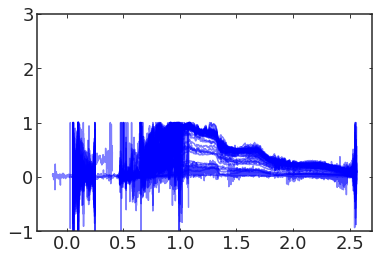

In [41]:
fig, ax=plt.subplots()
for x in combined_df.spectra:
    plt.plot(x.wave, x.flux/np.nanmax(x.flux), alpha=0.5, c='b')
ax.set(ylim=[-1, 3])  

In [16]:
import glob
import splat
kast_path='/users/caganze/research/kastredux/resources/spectral_standards/*'

In [17]:
#s.plot()

In [18]:
def read_kast_spectra(file):
    try:
        s=splat.Spectrum(filename=file, wunit=u.Angstrom)
        s.toWaveUnit(u.micron)
        return s
    except:
        return None
    
def get_spectraltype(s):
    if s is None: return None
    else: return s.name.split(' ')[-1].split('_')[0]

In [19]:
files=glob.glob(kast_path)
spectra=[read_kast_spectra(x) for x in files]

In [20]:
#kast_apth

In [21]:
kast_df=pd.DataFrame()
kast_df['spectra']=spectra
kast_df['sptype']=[get_spectraltype(s) for s in spectra]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'serif' not found because none of the following families were found: 


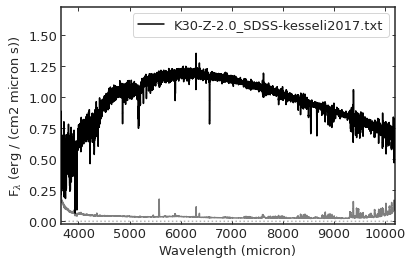

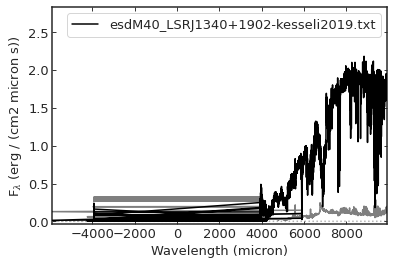

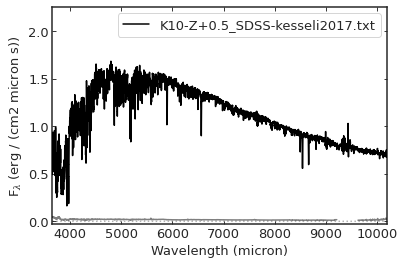

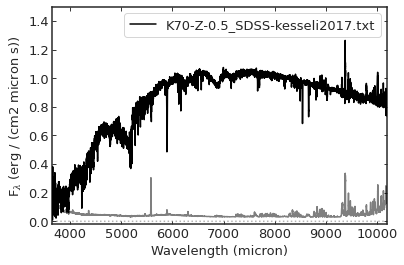

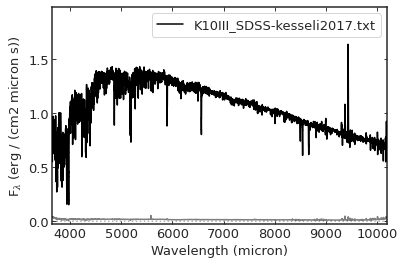

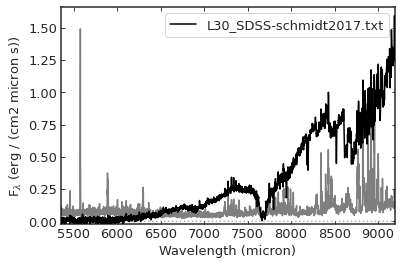

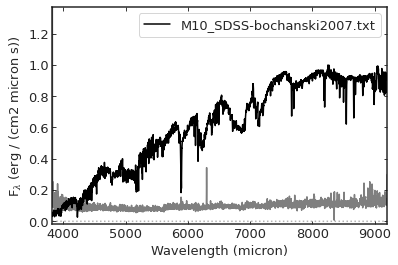

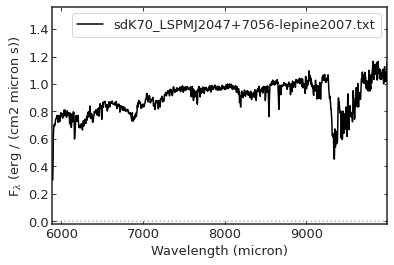

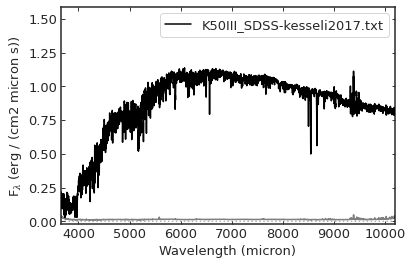

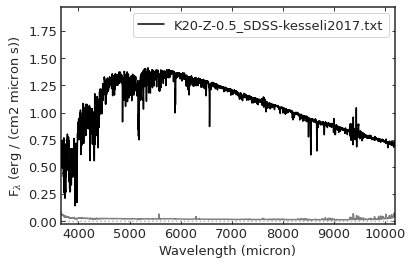

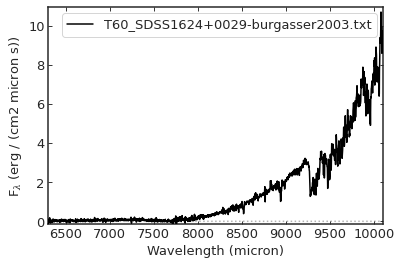

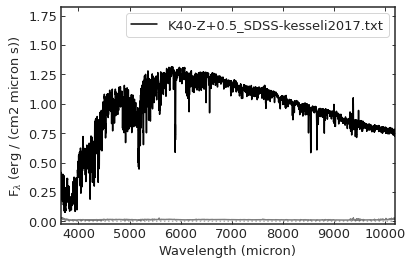

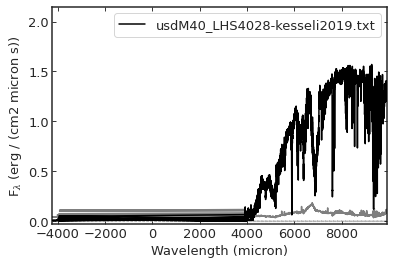

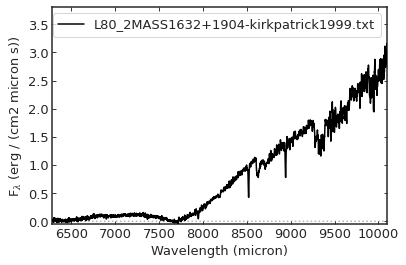

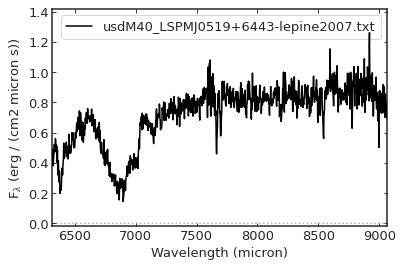

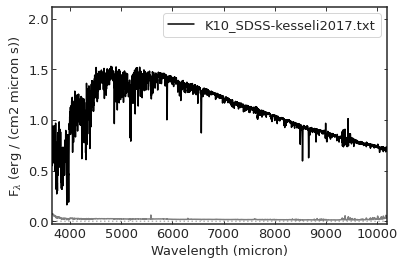

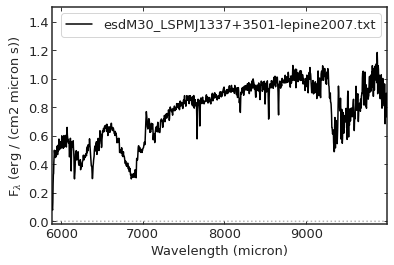

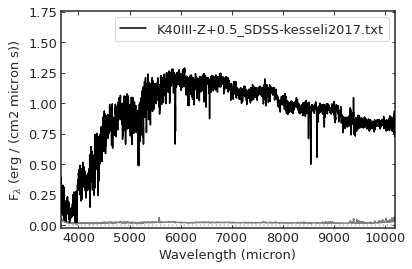

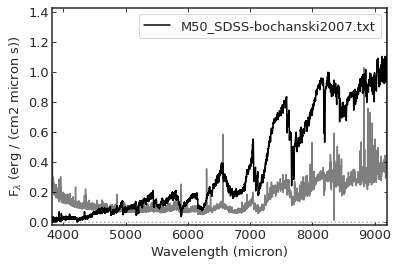

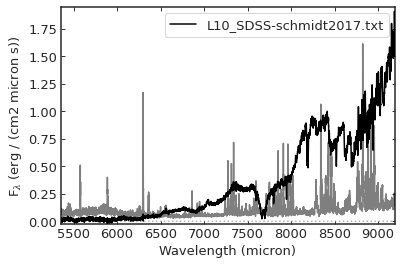

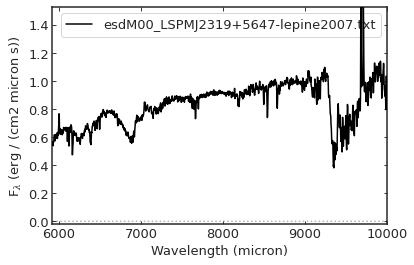

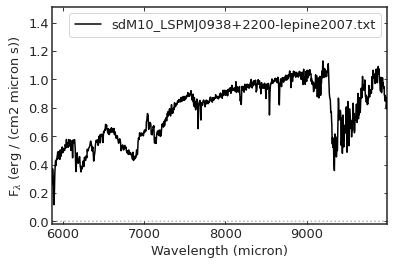

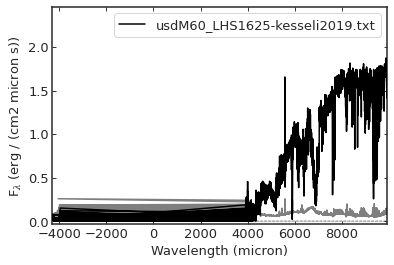

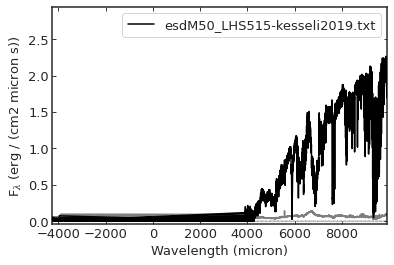

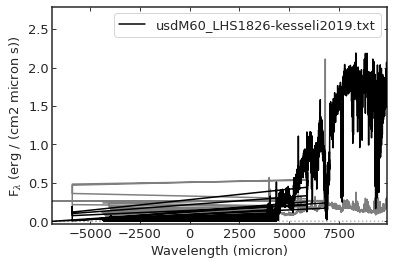

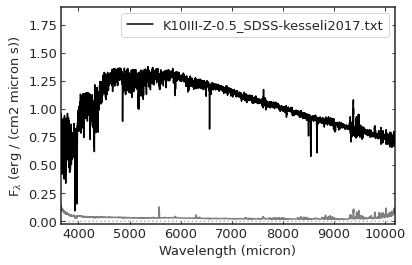

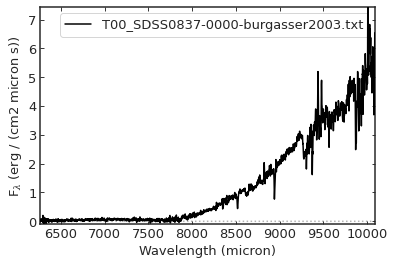

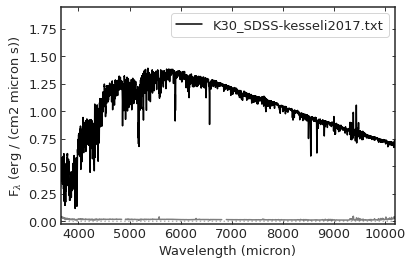

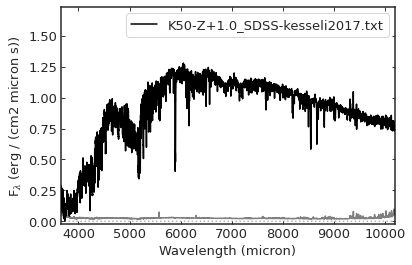

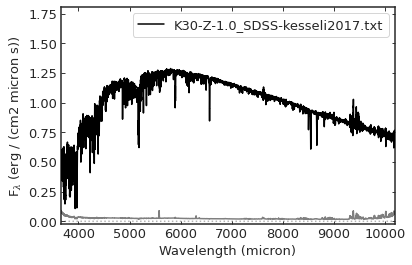

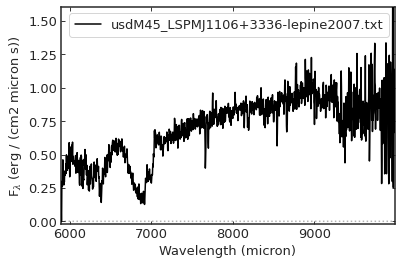

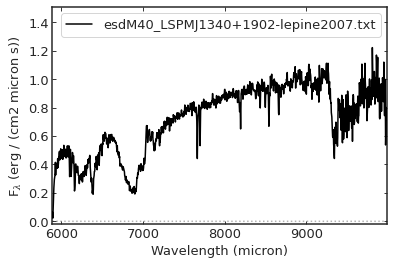

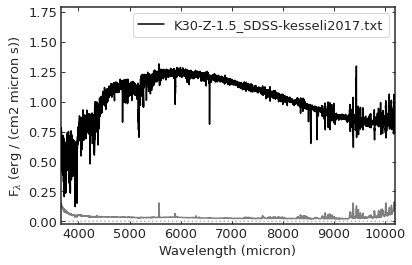

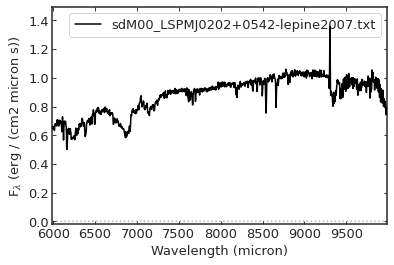

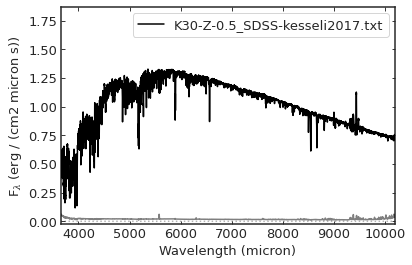

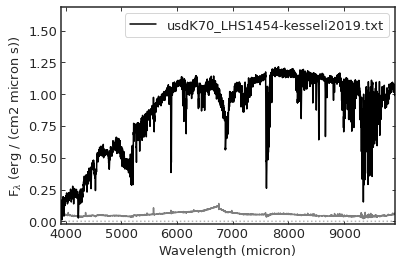

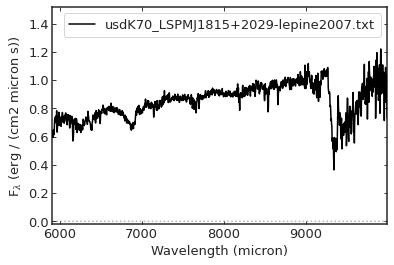

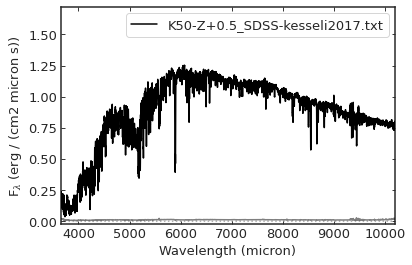

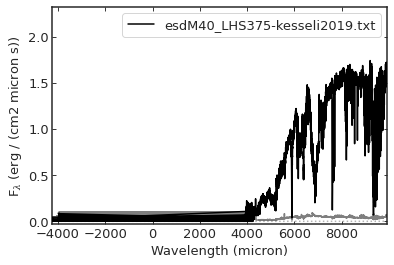

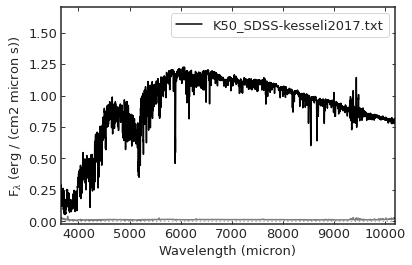

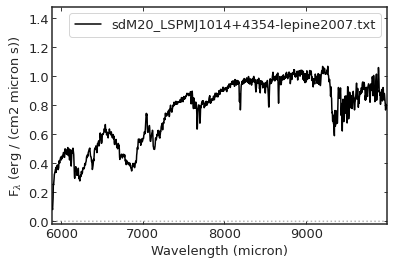

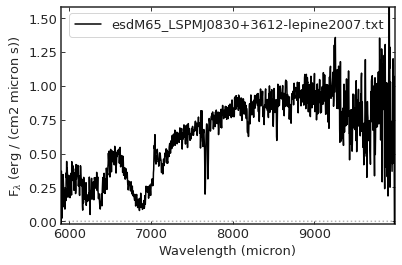

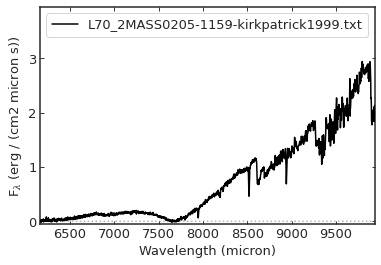

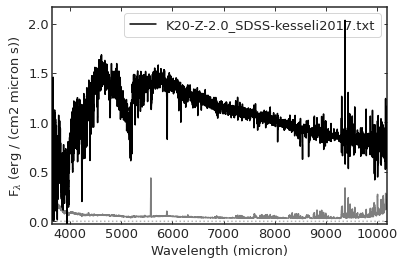

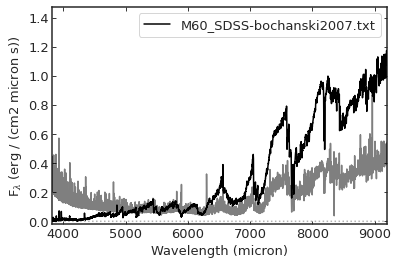

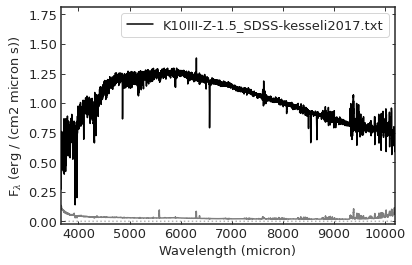

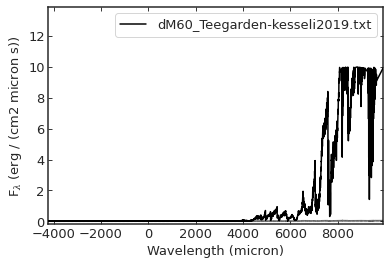

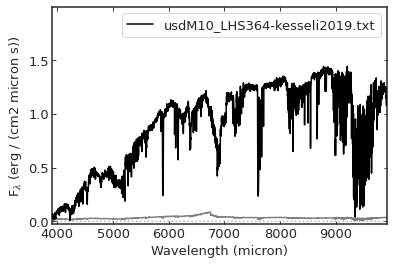

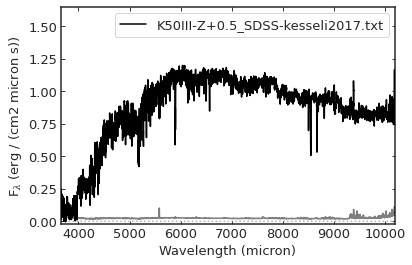

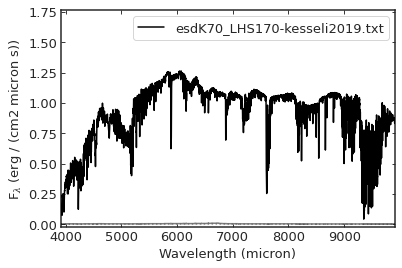

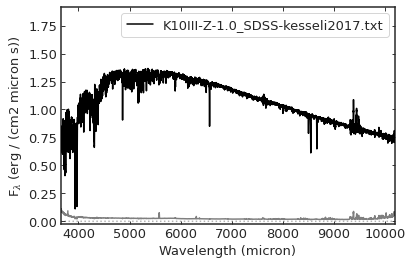

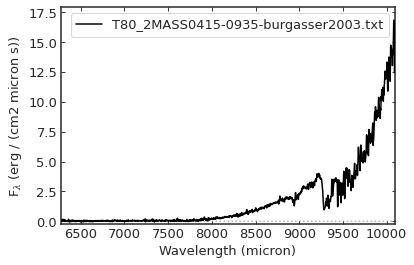

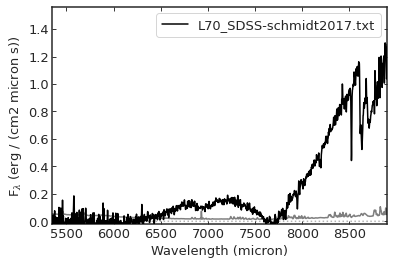

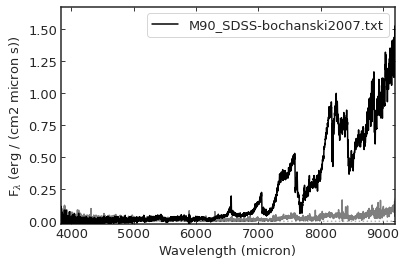

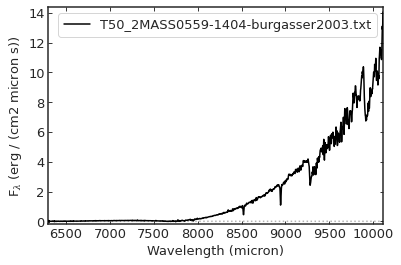

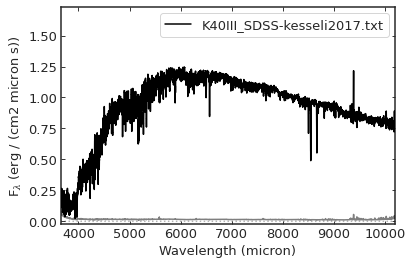

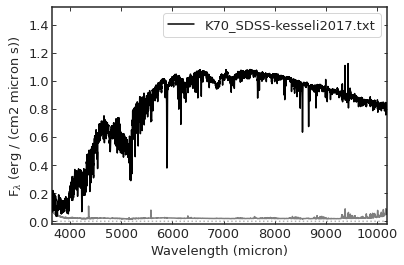

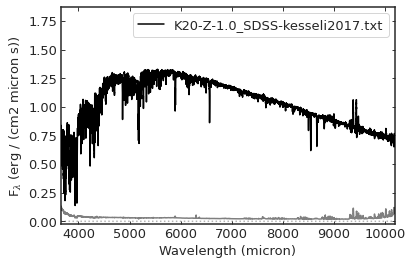

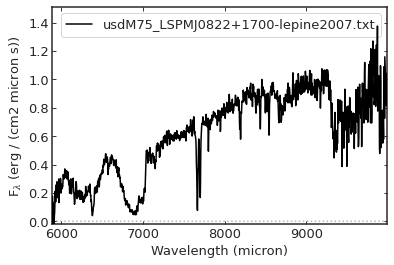

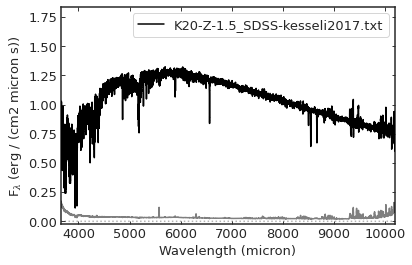

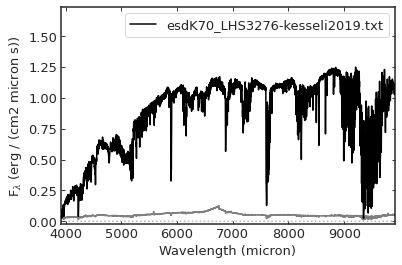

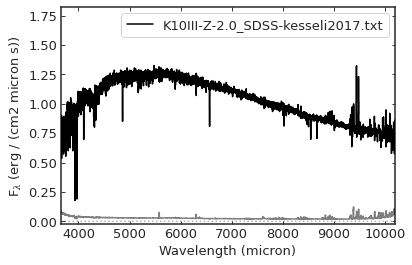

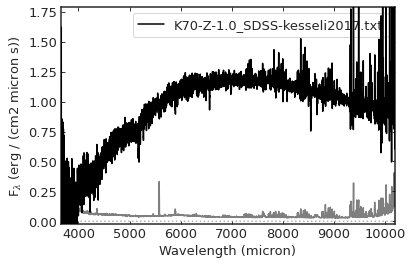

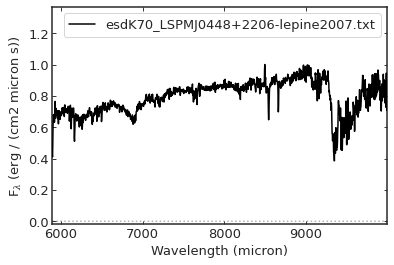

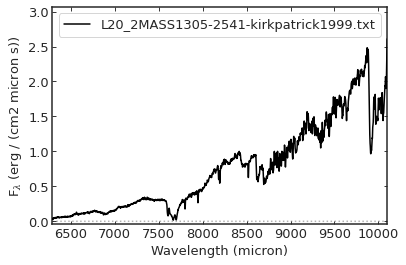

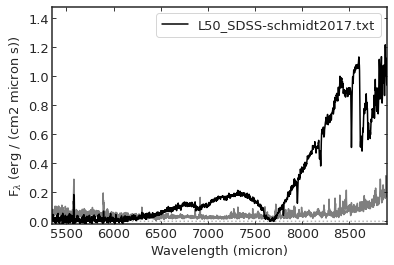

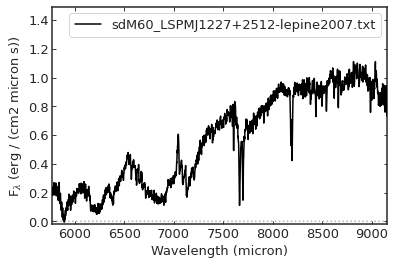

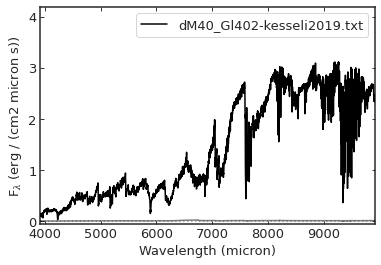

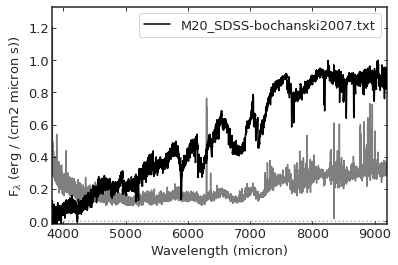

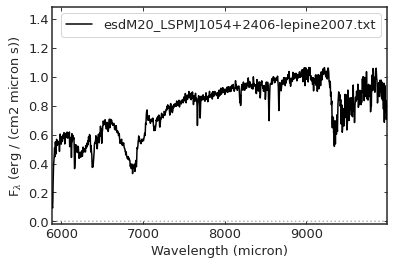

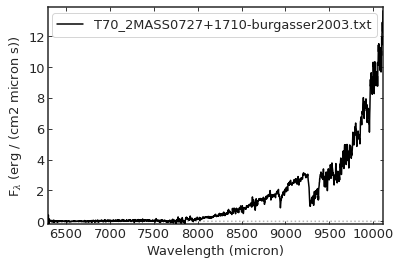

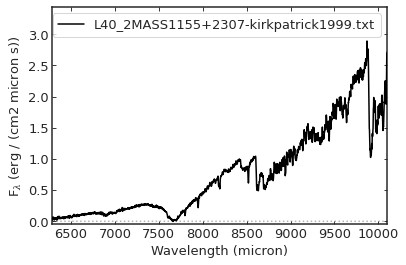

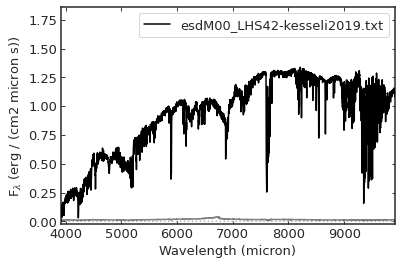

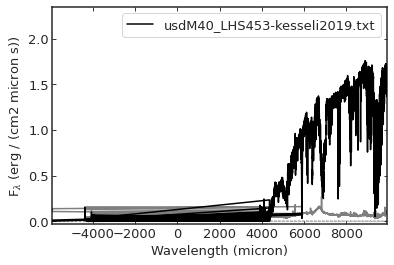

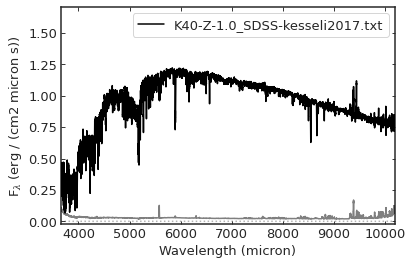

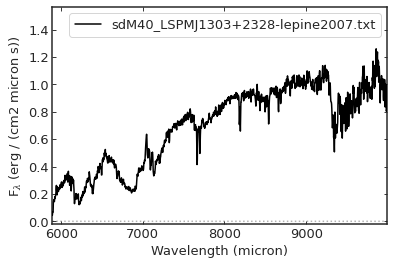

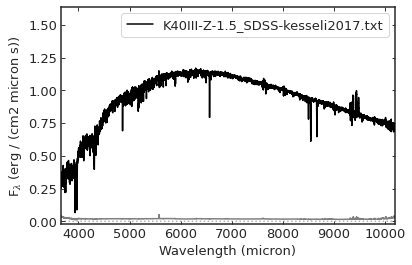

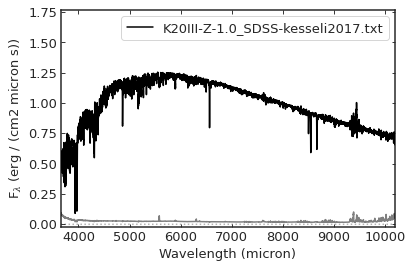

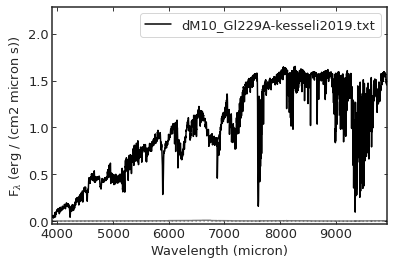

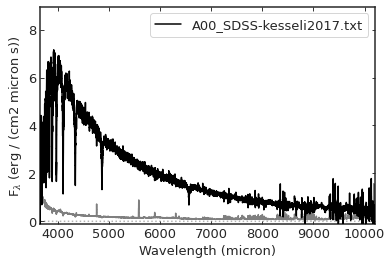

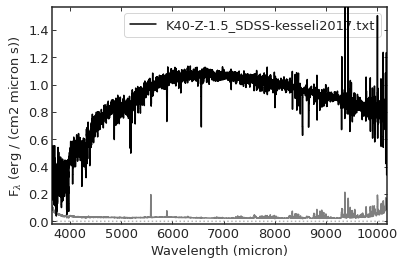

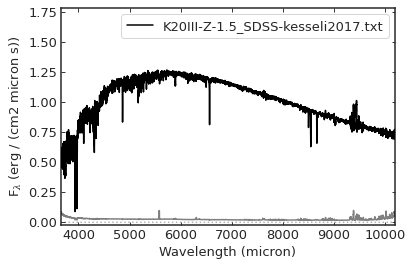

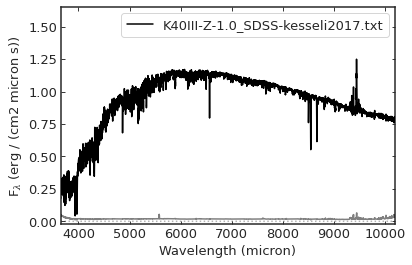

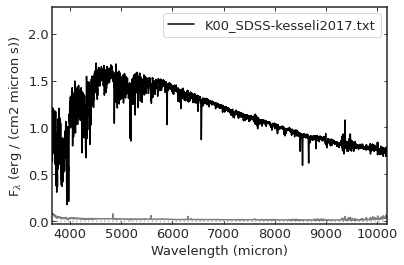

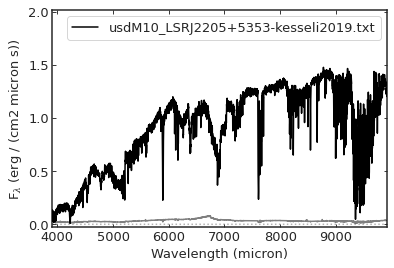

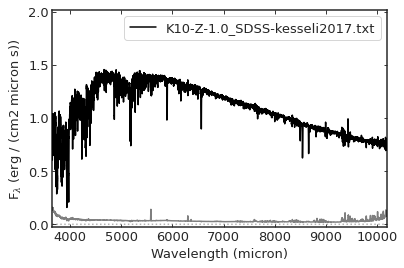

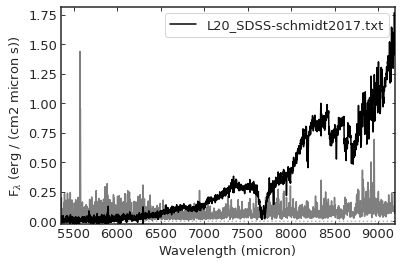

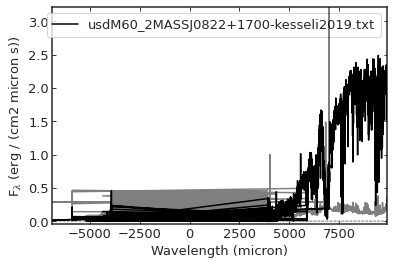

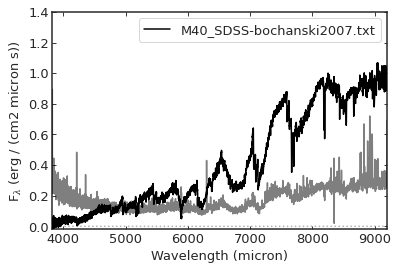

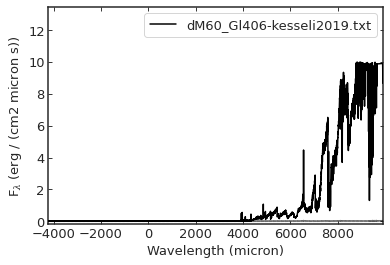

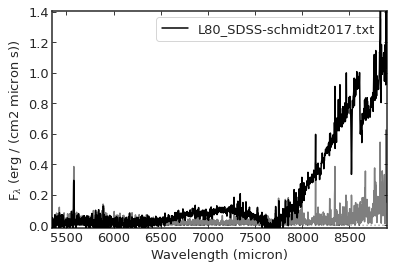

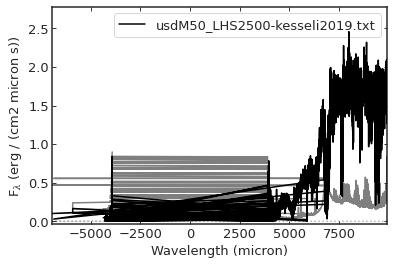

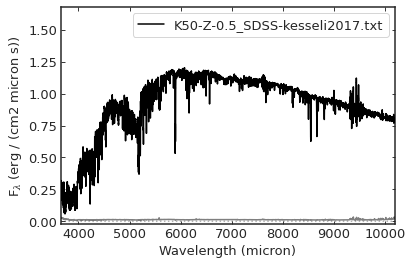

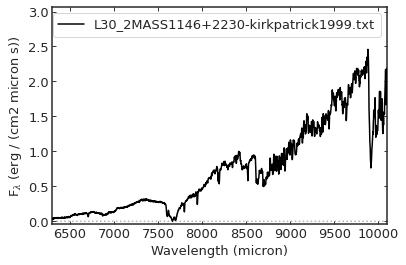

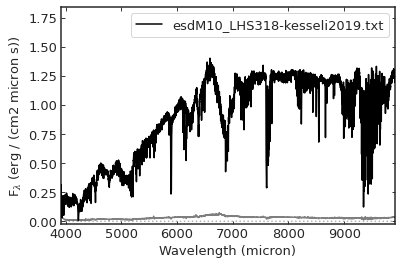

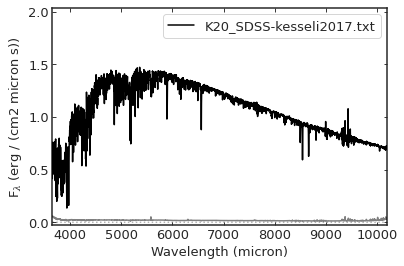

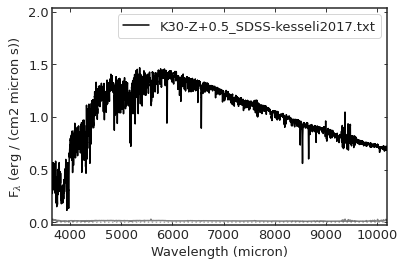

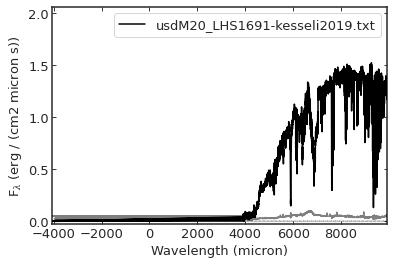

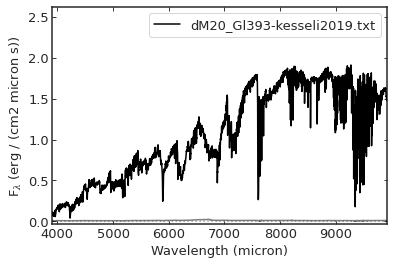

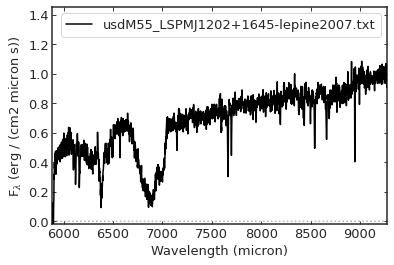

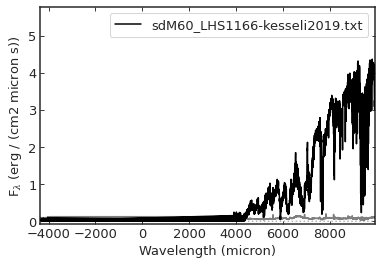

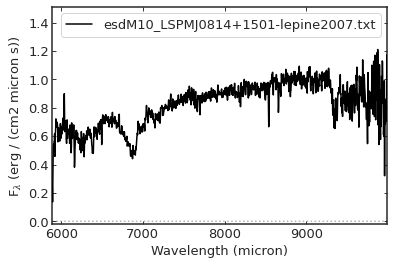

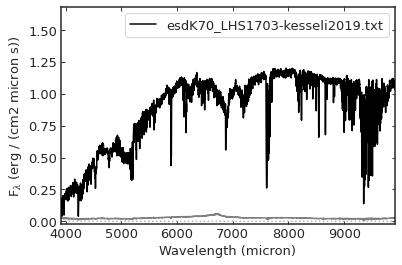

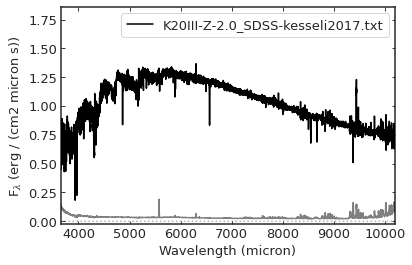

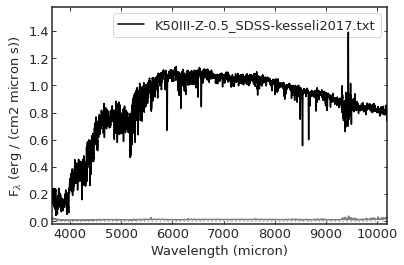

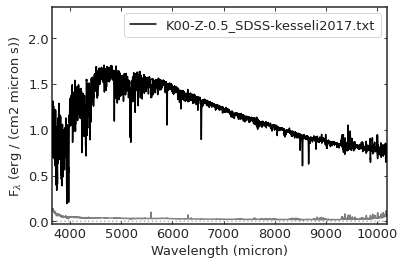

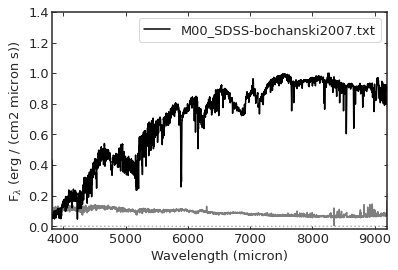

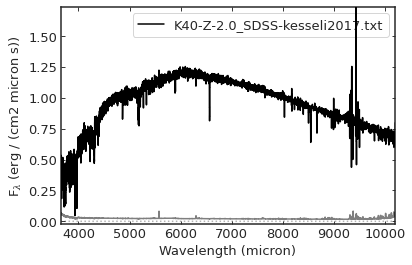

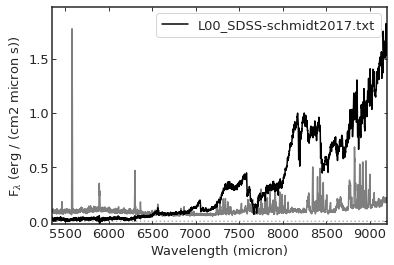

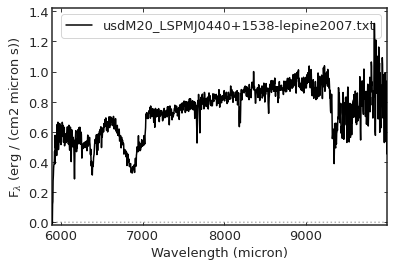

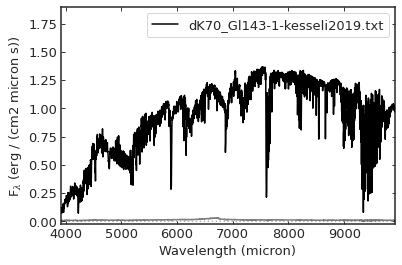

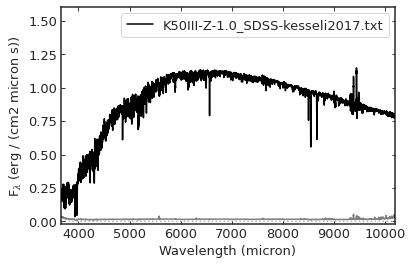

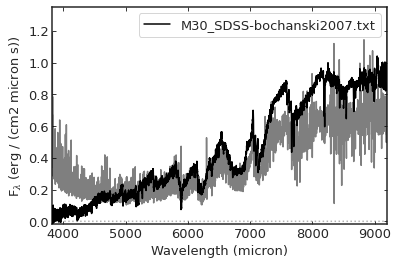

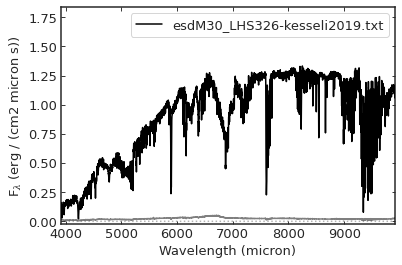

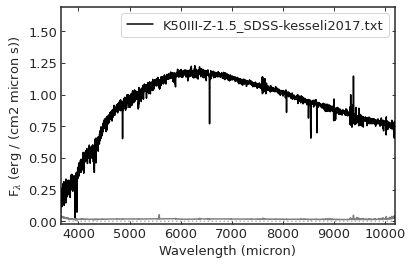

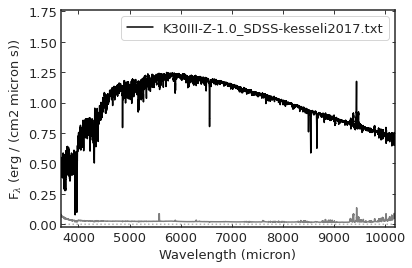

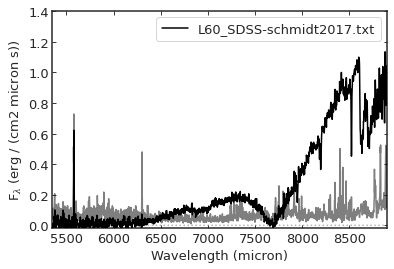

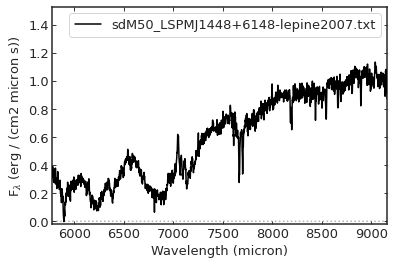

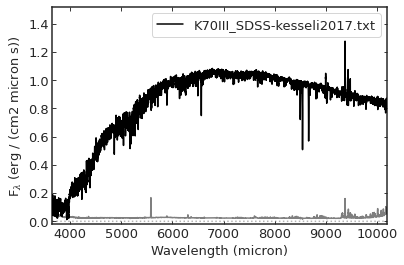

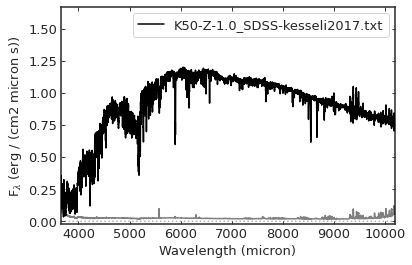

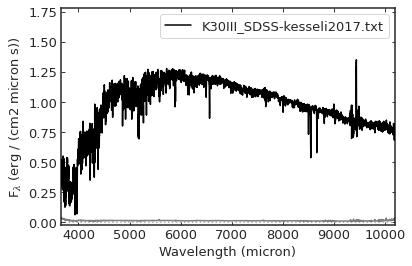

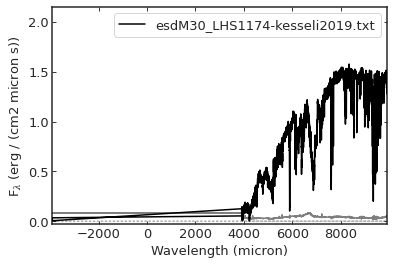

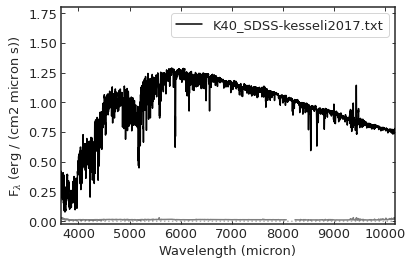

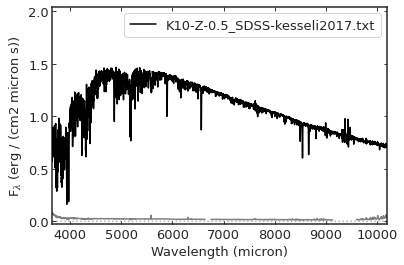

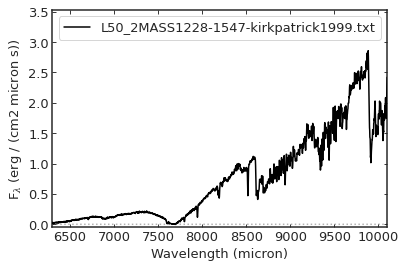

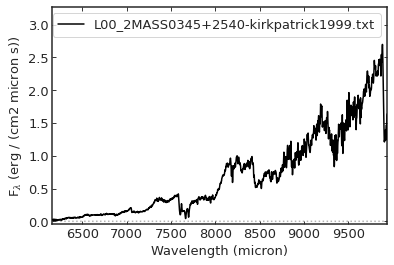

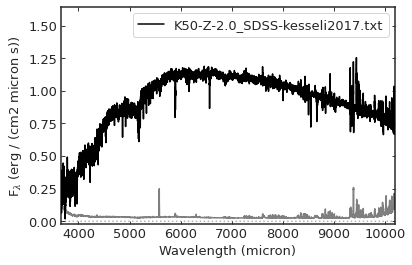

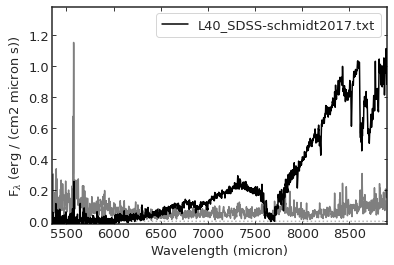

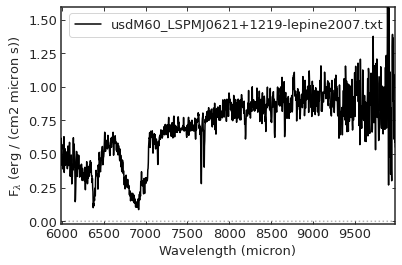

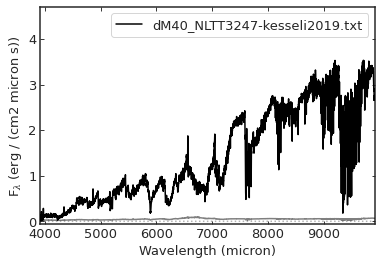

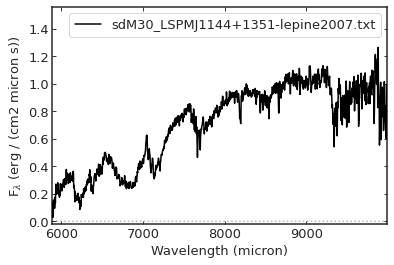

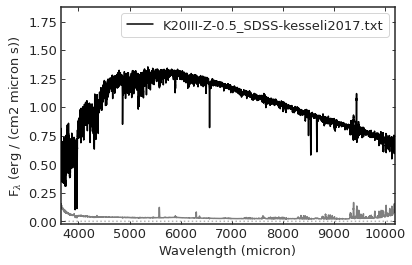

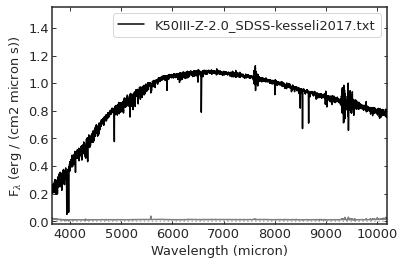

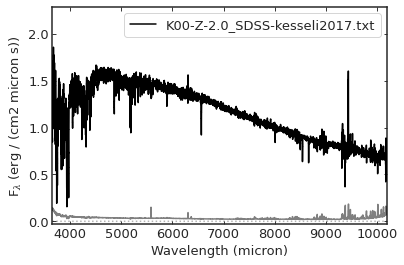

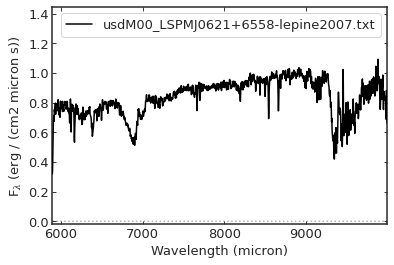

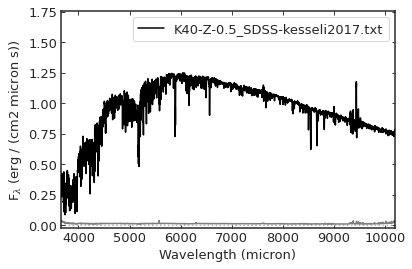

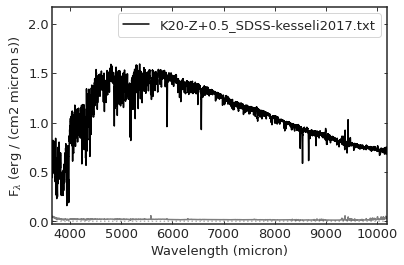

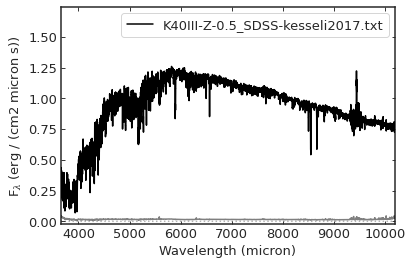

0      [Figure(432x288)]
1      [Figure(432x288)]
2      [Figure(432x288)]
3      [Figure(432x288)]
4      [Figure(432x288)]
             ...        
161    [Figure(432x288)]
162    [Figure(432x288)]
163    [Figure(432x288)]
164    [Figure(432x288)]
165    [Figure(432x288)]
Name: spectra, Length: 164, dtype: object

In [22]:
kast_df.dropna().spectra.apply(lambda x: x.plot())

In [23]:
kast_df.to_pickle(popsims.DATA_FOLDER+'/combined_optical_templates.pkl')

In [24]:
popsims.DATA_FOLDER

'/volumes/LaCie/popsimsdata/popsims/'